# Note on titanic binary classification project

**Objective**: Predict the survival of passengers on the Titanic

https://www.kaggle.com/c/titanic/data


** Step 1 **: Load libraries

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import tensorflow as tf
import keras as k

from sklearn import preprocessing

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


** Step 2 **: Need to load data set from a csv file. Numpy's genfromtxt can be used, however, because ',' is present in string, use pandas's read_csv instead.

In [2]:
#load data sets
data_set = pd.read_csv('data/train.csv', delimiter=',', quotechar='"')
test_set = pd.read_csv('data/test.csv', delimiter=',', quotechar='"')

In [169]:
#have a look at the training data
data_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [171]:
# show missing data
print('Missing data in each feature in training set:\n', data_set.isnull().sum())

Missing data in each feature in training set:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [172]:
# replacing missing values in 'Age' with median age
median_age = data_set['Age'].median()
data_set['Age'].fillna(median_age, inplace=True)
print('Median age =', median_age)

Median age = 28.0


In [176]:
# replace 2 missing embarked values by first finding the most frequent value
port = data_set['Embarked'].value_counts().idxmax()
data_set['Embarked'].fillna(port, inplace=True)

# Check data_set again, should only have 'Cabin' missing
data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [177]:
#check missing values in test set
print('Missing data in each feature in test set:\n', test_set.isnull().sum())

Missing data in each feature in test set:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [179]:
# replace mssing values in 'Age' with median age
median_age = test_set['Age'].median()
test_set['Age'].fillna(median_age, inplace=True)
print('Median age in test set =', median_age)

#replace missing fare value with mean value
test_set['Fare'].fillna(test_set['Fare'].mean(), inplace=True)

# check test_set missing values again
test_set.isnull().sum()

Median age in test set = 27.0


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [181]:
n_train = data_set.shape[0]
n_test = test_set.shape[0]
n_x = data_set.shape[1]

print("Number of data examples: n_train = " + str(n_train))
print("Number of testing examples: n_test = " + str(n_test))
print("Number of all features for each example: n_x = " + str(n_x))

Number of data examples: n_train = 891
Number of testing examples: n_test = 418
Number of all features for each example: n_x = 12


In [182]:
# Different features in the data set
data_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [183]:
# Output labels
y = data_set['Survived']

### Analyze input features
* `PassengerId` does not carry any meaningful information and can be ignored
* `Name`: maybe titles can be analyze for information on status but for now can be ignored
* `Embarked` gives the Port of Embarkation with C = Cherbourg, Q = Queenstown, S = Southampton. Can we perhaps safely ignore this feature?? Let's have a look below.
* `Cabin` may be useful, but a lot of data are missing and cannot be meaningfully filled in 
* `Ticket` does not appear to carry meaningful information and will be ignored for now
* `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, and `Fare` are included for now.

In [184]:
data_set.groupby(['Ticket'])['PassengerId'].nunique()

Ticket
110152               3
110413               3
110465               2
110564               1
110813               1
111240               1
111320               1
111361               2
111369               1
111426               1
111427               1
111428               1
112050               1
112052               1
112053               1
112058               1
112059               1
112277               1
112379               1
113028               1
113043               1
113050               1
113051               1
113055               1
113056               1
113059               1
113501               1
113503               1
113505               2
113509               1
                    ..
SOTON/OQ 392082      1
SOTON/OQ 392086      1
SOTON/OQ 392089      1
SOTON/OQ 392090      1
STON/O 2. 3101269    1
STON/O 2. 3101273    1
STON/O 2. 3101274    1
STON/O 2. 3101275    1
STON/O 2. 3101280    1
STON/O 2. 3101285    1
STON/O 2. 3101286    1
STON/O 2. 3101288    1
STON

For the time beging I don't think I can draw useful information from `ticket`.

In [160]:
data_set.groupby(['Embarked'])['PassengerId'].nunique()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [154]:
data_set[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


It appears that a large portion of passengers departed from Southampton, and a significant fraction of people departing from Cherbourg survived. Perhaps I should include this information

In [185]:
# Extract some starting features for input X
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_temp = data_set[features]

# Assign values to gender and embarked
X_temp['Sex'] = X_temp['Sex'].map({'male' : 1, 'female' : 0})
X_temp['Embarked'] = X_temp['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

# print X
X_temp.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


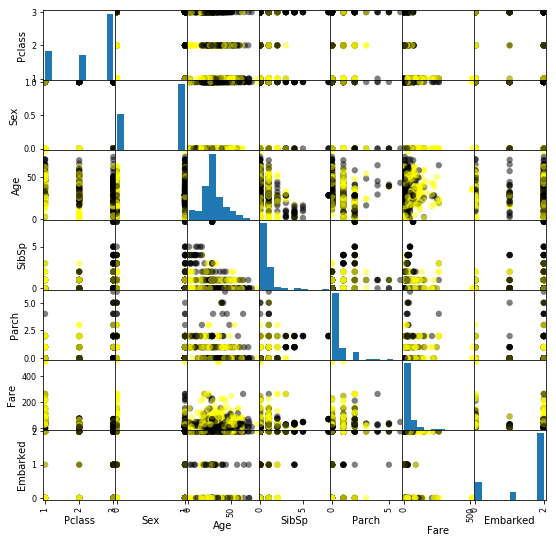

In [186]:
# plotting a scatter matrixb
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_temp, c= y, marker = 'o', s=40, hist_kwds={'bins':10}, figsize=(9,9), cmap=cmap)

It appears that there is a strong correlation between Sex and survival. Women tend to survive.
* (Sex, Fare): Women with higher fares seem to have a higher survival rate than women with lower fares. Men with the highest fares seemed to survive.
* (Sex, Parch): Women with fewer children/parents have higher survival rate. No clear trend for men.
* (Sex, SibSp): No clear trend for both men and women
* (Sex, Age): Not very clear trend for both men and women
* (Sex, Pclass): Women in 1st and 2nd class survived while women in 3rd class didn't. No clear trend for men.
* (Sex, Embarked): It appears that for both genders, but more so for women, people embarking at Cherbourg had a better chance of survival.

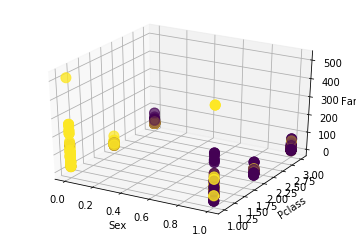

In [16]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_temp['Sex'], X_temp['Pclass'], X_temp['Fare'], c = y, marker = 'o', s=100)
ax.set_xlabel('Sex')
ax.set_ylabel('Pclass')
ax.set_zlabel('Fare')
plt.show()

In [92]:
# survival rate of female vs. male
data_set[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [93]:
# survival rate with respect to Pclass
data_set[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [94]:
# survival rate with respect to SibSp
data_set[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [95]:
# survival rate with respect to Parch
data_set[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [187]:
# Extract features for input X taking into account analysis above
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X = data_set[features]
n_features = X.shape[1]
print('Number of features to train = ', n_features)

# print X
X.head()

Number of features to train =  7


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [188]:
# label gender
X['Sex'] = X['Sex'].map({'male' : 1, 'female' : 0})
X['Embarked'] = X['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

X.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [189]:
#Extract the same features for X_test and label gender
X_test = test_set[features]
X_test['Sex'] = X_test['Sex'].map({'male' : 1, 'female' : 0})
X_test['Embarked'] = X_test['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

X_test.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [190]:
#normalizing input features for both data sets using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [191]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = train_test_split(X, y, random_state=0)

print('Number of training examples: ', X_train.shape[0])
print('Number of examples for cross validation: ', X_dev.shape[0])

Number of training examples:  668
Number of examples for cross validation:  223


In [192]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 4).fit(X_train, y_train)

#score for predictions on the dev set
print('Score for predictions on the training set using KNN: ', knnreg.score(X_train, y_train))
score = knnreg.score(X_dev, y_dev)
print('Score for predictions on the dev set using KNN: ', score)

Score for predictions on the training set using KNN:  0.6084704102854983
Score for predictions on the dev set using KNN:  0.4103181740322026


In [193]:
# linear regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)
print('Score for predictions on the training set: ', linreg.score(X_train, y_train))
print('Score for predictions on the training set: ', linreg.score(X_dev, y_dev))

Score for predictions on the training set:  0.3924097245373699
Score for predictions on the training set:  0.408894574148575


In [194]:
# ridge regression
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=20.0).fit(X_train, y_train)
print('Score for predictions on the training set: ', ridgereg.score(X_train, y_train))
print('Score for predictions on the training set: ', ridgereg.score(X_dev, y_dev))

Score for predictions on the training set:  0.3772549473185107
Score for predictions on the training set:  0.39473675013856213


In [195]:
# lasso regression
from sklearn.linear_model import Lasso

lassoreg = Ridge(alpha=100.0, max_iter = 10000).fit(X_train, y_train)
print('Score for predictions on the training set: ', lassoreg.score(X_train, y_train))
print('Score for predictions on the training set: ', lassoreg.score(X_dev, y_dev))

Score for predictions on the training set:  0.31810201292232887
Score for predictions on the training set:  0.3331112225709496


In [196]:
# logistic regression
from sklearn.linear_model import LogisticRegression

losreg = LogisticRegression(C = 100, solver='lbfgs', max_iter=10000).fit(X_train, y_train)
print('Score for predictions on the training set: ', losreg.score(X_train, y_train))
print('Score for predictions on the training set: ', losreg.score(X_dev, y_dev))

Score for predictions on the training set:  0.8038922155688623
Score for predictions on the training set:  0.7937219730941704


In [197]:
# random forest
from sklearn.ensemble import RandomForestRegressor

randreg = RandomForestRegressor(n_estimators = 100, random_state=0).fit(X_train, y_train)
print('Score for predictions on the training set: ', randreg.score(X_train, y_train))
print('Score for predictions on the training set: ', randreg.score(X_dev, y_dev))

Score for predictions on the training set:  0.8790005440411978
Score for predictions on the training set:  0.4680409205857672


In [198]:
# LSVM
from sklearn.svm import SVC

lsvm = SVC(kernel = 'linear', C=1.0).fit(X_train, y_train)
print('Score for predictions on the training set: ', lsvm.score(X_train, y_train))
print('Score for predictions on the training set: ', lsvm.score(X_dev, y_dev))

Score for predictions on the training set:  0.7889221556886228
Score for predictions on the training set:  0.7802690582959642


In [199]:
# SVM with RBF kernel (default option)
from sklearn.svm import SVC

rbf_svm = SVC(C=1.0, gamma='scale').fit(X_train, y_train)
print('Score for predictions on the training set: ', rbf_svm.score(X_train, y_train))
print('Score for predictions on the training set: ', rbf_svm.score(X_dev, y_dev))

Score for predictions on the training set:  0.8203592814371258
Score for predictions on the training set:  0.8026905829596412


In [200]:
# SVM with polynomial kernel
from sklearn.svm import SVC

poly_svm = SVC(C=1.0, kernel='poly', gamma='scale').fit(X_train, y_train)
print('Score for predictions on the training set: ', poly_svm.score(X_train, y_train))
print('Score for predictions on the training set: ', poly_svm.score(X_dev, y_dev))

Score for predictions on the training set:  0.8233532934131736
Score for predictions on the training set:  0.7937219730941704


In [201]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
print('Score for predictions on the training set: ', tree.score(X_train, y_train))
print('Score for predictions on the training set: ', tree.score(X_dev, y_dev))

Score for predictions on the training set:  0.9805389221556886
Score for predictions on the training set:  0.7623318385650224


In [202]:
# Make predictions on unseen data using SVM
Y_pred = rbf_svm.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int)
Y = pd.DataFrame(data=Y_pred, columns=['Survived'])
Y.insert(loc=0, column='PassengerId', value=test_set['PassengerId'])

In [203]:
Y.to_csv('data/submission_AR.csv', index=False)

In [204]:
print('Number of people who survived: ', Y['Survived'].sum())

Number of people who survived:  125
